#1 Standard scaling
Standard scaling is a method to standardize the features by removing the mean and scaling to unit variance. This is useful when the features have different units or scales.

The formula for standard scaling is:
 z = x - μ/ σ

where:

In [3]:
#import Libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [4]:
data={
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],
    'weight': [55, 60, 65, 70, 75]
}
df=pd.DataFrame(data)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()
#fit the scaler to the data
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [5]:
#min max scaler = minmax_scale(df)
# Initialize the MinMaxScaler
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df)
scaled_df

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [6]:
#max abs scaler = maxabs_scale(df)
# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df)
scaled_df
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
# Display the scaled DataFrame
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


In [7]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler() 
# Fit the scaler to the data
scaled_df = scaler.fit_transform(df)
# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
# Display the scaled DataFrame
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


In [19]:
#DATA Transformation
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
np.random.seed(0)
df=np.random.exponential(scale=2, size=1000)
df=pd.DataFrame(df, columns=['Values'])
df.head()

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Values', ylabel='Count'>

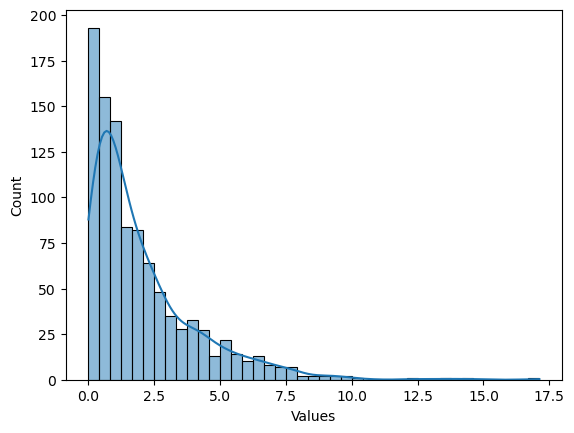

In [21]:
sns.histplot(df['Values'], kde=True)

In [24]:
#data must be positive for Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_Quantile=QuantileTransformer(output_distribution='normal')
#convert the data to positive values for Box-Cox transformation
df['box_cox'] = pt_boxcox.fit_transform(df[['Values']]+1)
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['Values']])
df['Quantile'] = qt_Quantile.fit_transform(df[['Values']])


In [25]:
df.head()

,Values,box_cox,yeo_johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


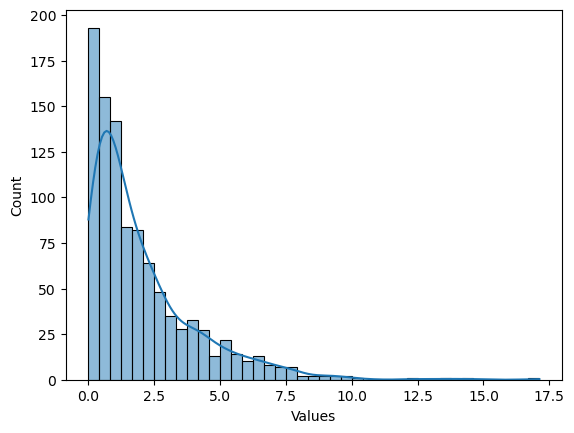

c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


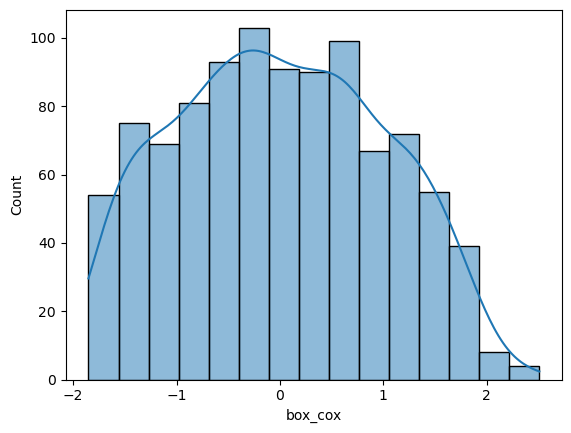

c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


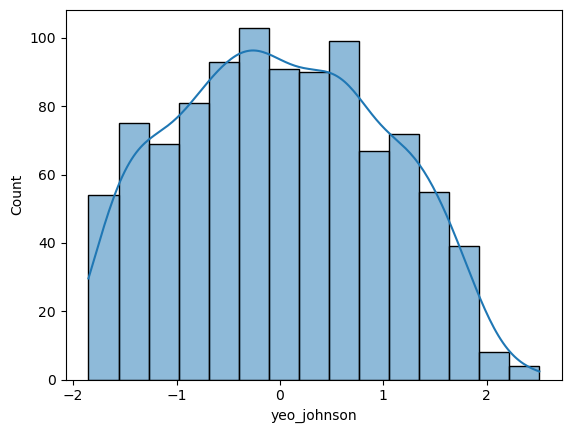

c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


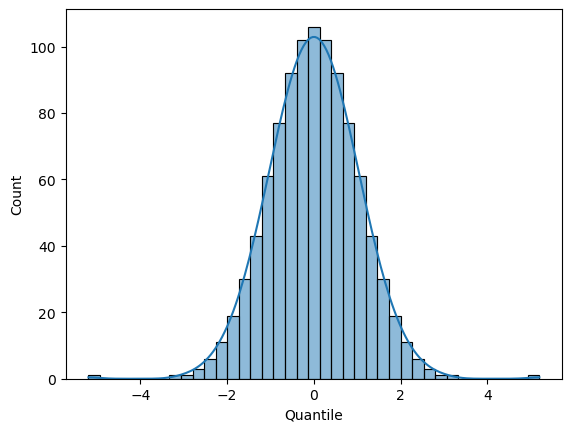

In [26]:
#create a histogram of the transformed data
for col in df.columns:
    
    sns.histplot(df[col], kde=True)
    plt.show()
    

In [2]:
#normalization

In [7]:
df = [[1,1,1],[1,1,0],[1,0,0]]
from sklearn.preprocessing import Normalizer
# Initialize the Normalizer
normalizer = Normalizer(norm='l2')
norm= normalizer.fit_transform(df)
norm

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

In [9]:
#l1 normalization
normalizer = Normalizer(norm='l1')
norm_l1 = normalizer.fit_transform(df)
norm_l1

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

In [10]:
#1. zscore normalization
    #standard scaler
#2. min-max normalization
    #minmax scaler

In [19]:
#log transfromation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#example data set of skewed values
df=pd.DataFrame({'values':[1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]})
df

,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


In [20]:
df['log_values'] = np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


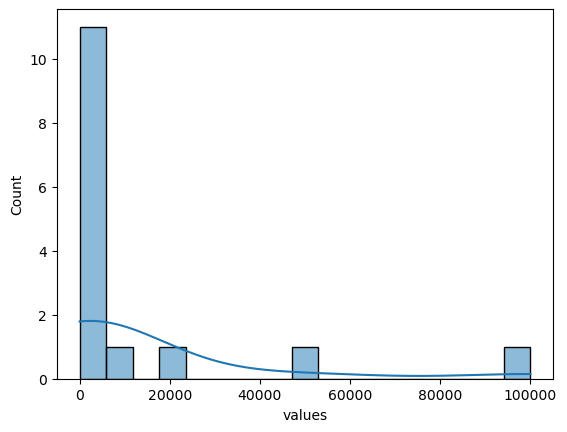

c:\Users\Abdul moeez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


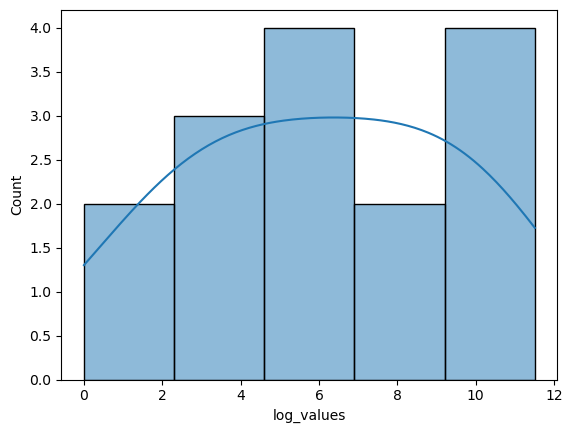

In [21]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()